In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sqlalchemy import create_engine
from sqlalchemy.engine.url import URL
import config
from config import CONNSTRING
from sklearn.model_selection import train_test_split



In [2]:
#read the data from SQL
engine= create_engine(CONNSTRING)

query = "SELECT * FROM customer_data"
df = pd.read_sql(query, engine)


In [3]:
#print the df to check the columns
df.head()

,Customer ID,age,gender,Item Purchased,category,Purchase Amount (USD),location,size,color,season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53.0,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64.0,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73.0,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90.0,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49.0,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
df.columns

Index(['Customer ID', 'age', 'gender', 'Item Purchased', 'category',
       'Purchase Amount (USD)', 'location', 'size', 'color', 'season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [5]:
# Handle Missing Values: 
df.isna().sum()

Customer ID               0
age                       0
gender                    0
Item Purchased            0
category                  0
Purchase Amount (USD)     0
location                  0
size                      0
color                     0
season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [6]:
#check the type of the variables
print(df.dtypes)

Customer ID                 int64
age                         int64
gender                     object
Item Purchased             object
category                   object
Purchase Amount (USD)     float64
location                   object
size                       object
color                      object
season                     object
Review Rating             float64
Subscription Status        object
Shipping Type              object
Discount Applied           object
Promo Code Used            object
Previous Purchases          int64
Payment Method             object
Frequency of Purchases     object
dtype: object


In [7]:
#Step 1: Data Preprocessing
# Converting columns to appropriate data types
df['Customer ID'] = df['Customer ID'].astype(int)  # Assuming 'Customer ID' is an integer
df['age'] = df['age'].astype(int)  # Age is an integer
df['gender'] = df['gender'].astype('category')  # Gender as category
df['Item Purchased'] = df['Item Purchased'].astype('category')  # Item Purchased as category
df['category'] = df['category'].astype('category')  # Category as category
df['Purchase Amount (USD)'] = df['Purchase Amount (USD)'].astype(float)  # Purchase Amount as float
df['location'] = df['location'].astype('category')  # Location as category
df['size'] = df['size'].astype('category')  # Size as category
df['color'] = df['color'].astype('category')  # Color as category
df['season'] = df['season'].astype('category')  # Season as category
df['Review Rating'] = df['Review Rating'].astype(float)  # Review Rating as float
df['Subscription Status'] = df['Subscription Status'].astype('category')  # Subscription Status as category
df['Shipping Type'] = df['Shipping Type'].astype('category')  # Shipping Type as category
df['Discount Applied'] = df['Discount Applied'].astype('category')  # Discount Applied as category (assuming 'Yes'/'No')
df['Promo Code Used'] = df['Promo Code Used'].astype('category')  # Promo Code Used as category
df['Previous Purchases'] = df['Previous Purchases'].astype(int)  # Previous Purchases as integer
df['Payment Method'] = df['Payment Method'].astype('category')  # Payment Method as category
df['Frequency of Purchases'] = df['Frequency of Purchases'].astype('category')  # Frequency of Purchases as category

In [8]:
#Copy the original df to another

customer_segmentation = df[['age', 'gender', 'category', 'Purchase Amount (USD)', 'location', 'season', 'Review Rating', 'Subscription Status', 'Previous Purchases', 'Frequency of Purchases', 'Promo Code Used']].copy()

#Create dummies of the information that contains text
customer_segmentation_encoded = pd.get_dummies(customer_segmentation, columns=['gender','category','location','season','Subscription Status','Frequency of Purchases','Promo Code Used'])
customer_segmentation_encoded.head()

#drop the columns that are not necessary due to the type of data.
customer_segmentation_encoded.drop(['Promo Code Used_No','gender_Male','Subscription Status_No'], axis=1, inplace=True)

customer_segmentation_encoded.head()

,age,Purchase Amount (USD),Review Rating,Previous Purchases,gender_Female,category_Accessories,category_Clothing,category_Footwear,category_Outerwear,location_Alabama,...,season_Winter,Subscription Status_Yes,Frequency of Purchases_Annually,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Every 3 Months,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly,Promo Code Used_Yes
0,55,53.0,3.1,14,False,False,True,False,False,False,...,True,True,False,False,False,True,False,False,False,True
1,19,64.0,3.1,2,False,False,True,False,False,False,...,True,True,False,False,False,True,False,False,False,True
2,50,73.0,3.1,23,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,True
3,21,90.0,3.5,49,False,False,False,True,False,False,...,False,True,False,False,False,False,False,False,True,True
4,45,49.0,2.7,31,False,False,True,False,False,False,...,False,True,True,False,False,False,False,False,False,True


In [9]:
#define the x and the y
X = customer_segmentation_encoded.drop('Promo Code Used_Yes', axis=1)
y = customer_segmentation_encoded['Promo Code Used_Yes']

In [10]:
#divde train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [11]:
from sklearn.ensemble import RandomForestClassifier

#create mode
model = RandomForestClassifier(random_state=42)

#fit model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
from sklearn.metrics import classification_report, confusion_matrix

#make predictions
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[599  36]
 [179 356]]
              precision    recall  f1-score   support

       False       0.77      0.94      0.85       635
        True       0.91      0.67      0.77       535

    accuracy                           0.82      1170
   macro avg       0.84      0.80      0.81      1170
weighted avg       0.83      0.82      0.81      1170



Overall Accuracy: The model achieves an accuracy of 82%, indicating that, on average, 8 out of 10 predictions made by the model are correct.
Prediction of No Promo Code Usage:
Precision: 77%
Recall: 94%
F1-Score: 85%
Interpretation: The model is very effective in correctly identifying customers who will not use promo codes, with 94% of cases correctly identified. However, of all the customers predicted to not use promo codes, 23% would actually use a code.
Prediction of Promo Code Usage:
Precision: 91%
Recall: 67%
F1-Score: 77%
Interpretation: The model is very precise in predicting that a customer will use a promo code (91%), but it has a lower recall (67%), meaning some cases of customers who would use a promo code are missed.
Recommendations for Marketing Strategy

In [37]:
#SECOND ATTEMPT LEAVING OUT IRRELEVANT INFORMATION:
customer_segmentation_second = df[['age','gender','category','Purchase Amount (USD)','Subscription Status','Previous Purchases','Promo Code Used','Frequency of Purchases']].copy()
customer_segmentation_second.head()




,age,gender,category,Purchase Amount (USD),Subscription Status,Previous Purchases,Promo Code Used,Frequency of Purchases
0,55,Male,Clothing,53.0,Yes,14,Yes,Fortnightly
1,19,Male,Clothing,64.0,Yes,2,Yes,Fortnightly
2,50,Male,Clothing,73.0,Yes,23,Yes,Weekly
3,21,Male,Footwear,90.0,Yes,49,Yes,Weekly
4,45,Male,Clothing,49.0,Yes,31,Yes,Annually


In [38]:
#getting dummies
segmentation_encoded = pd.get_dummies(customer_segmentation_second, columns=['gender','category','Subscription Status','Promo Code Used','Frequency of Purchases'])

#drop the columns that are not necessary due to the type of data.
segmentation_encoded.drop(['gender_Male','Subscription Status_No','Promo Code Used_No'], axis=1, inplace=True)

segmentation_encoded.head()

,age,Purchase Amount (USD),Previous Purchases,gender_Female,category_Accessories,category_Clothing,category_Footwear,category_Outerwear,Subscription Status_Yes,Promo Code Used_Yes,Frequency of Purchases_Annually,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Every 3 Months,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly
0,55,53.0,14,False,False,True,False,False,True,True,False,False,False,True,False,False,False
1,19,64.0,2,False,False,True,False,False,True,True,False,False,False,True,False,False,False
2,50,73.0,23,False,False,True,False,False,True,True,False,False,False,False,False,False,True
3,21,90.0,49,False,False,False,True,False,True,True,False,False,False,False,False,False,True
4,45,49.0,31,False,False,True,False,False,True,True,True,False,False,False,False,False,False


In [39]:
#define the x and the y
X = segmentation_encoded.drop('Promo Code Used_Yes', axis=1)
y = segmentation_encoded['Promo Code Used_Yes']

In [34]:
#divde train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [40]:
#create model
model = RandomForestClassifier(random_state=42)

#fit model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [41]:
#make predictions
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[555  80]
 [148 387]]
              precision    recall  f1-score   support

       False       0.79      0.87      0.83       635
        True       0.83      0.72      0.77       535

    accuracy                           0.81      1170
   macro avg       0.81      0.80      0.80      1170
weighted avg       0.81      0.81      0.80      1170



When comparing models for identifying customers who will use promo codes, Option 2 is preferable. Although its precision is slightly lower (0.85 versus 0.91), it offers better recall (0.71 versus 0.67). This means that Option 2 is more effective at capturing potential customers, aligning better with the goal of maximizing the use of promotions. The accuracy is nearly identical between the two options.


In [19]:
# Filtrar los clientes que usan códigos de descuento
df_promo = df[df['Promo Code Used'] == 'Yes']

# Agrupar por características relevantes y calcular las frecuencias
age_distribution = df_promo['age'].value_counts().sort_index()
gender_distribution = df_promo['gender'].value_counts()
category_distribution = df_promo['category'].value_counts()
location_distribution = df_promo['location'].value_counts()
payment_method_distribution = df_promo['Payment Method'].value_counts()
frequency_of_purchases_distribution = df_promo['Frequency of Purchases'].value_counts()

In [42]:
def plot_bar(data, title, xlabel, ylabel, rotation=0):
    plt.figure(figsize=(10, 6))
    plt.bar(data.index, data.values, color='green')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=rotation)
    plt.show()


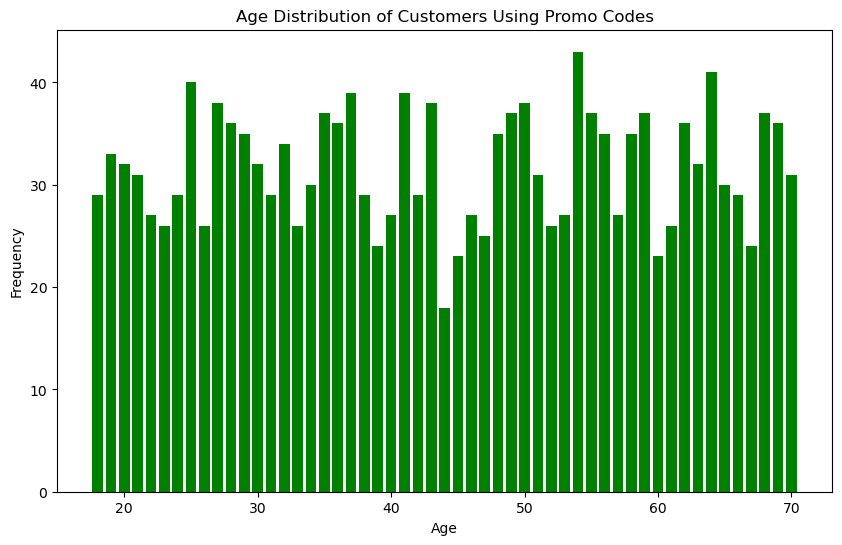

In [43]:
plot_bar(age_distribution, 'Age Distribution of Customers Using Promo Codes', 'Age', 'Frequency')


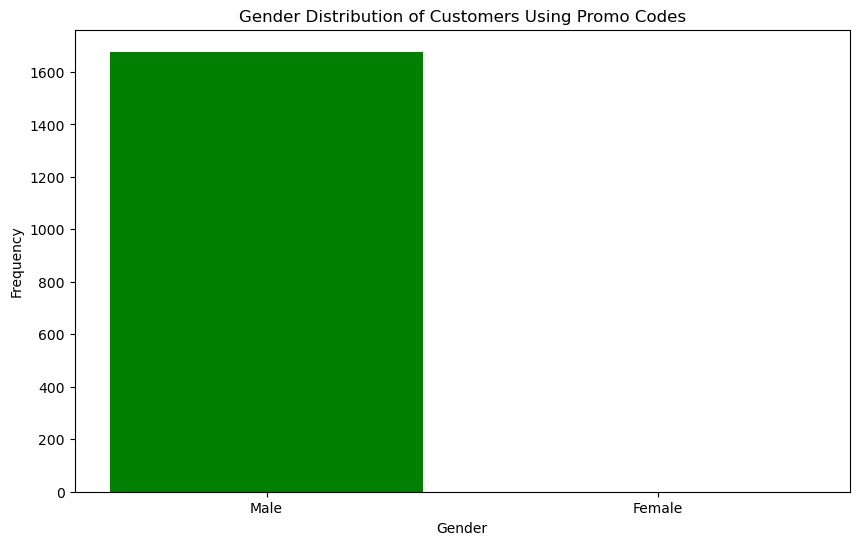

In [44]:
plot_bar(gender_distribution, 'Gender Distribution of Customers Using Promo Codes', 'Gender', 'Frequency')


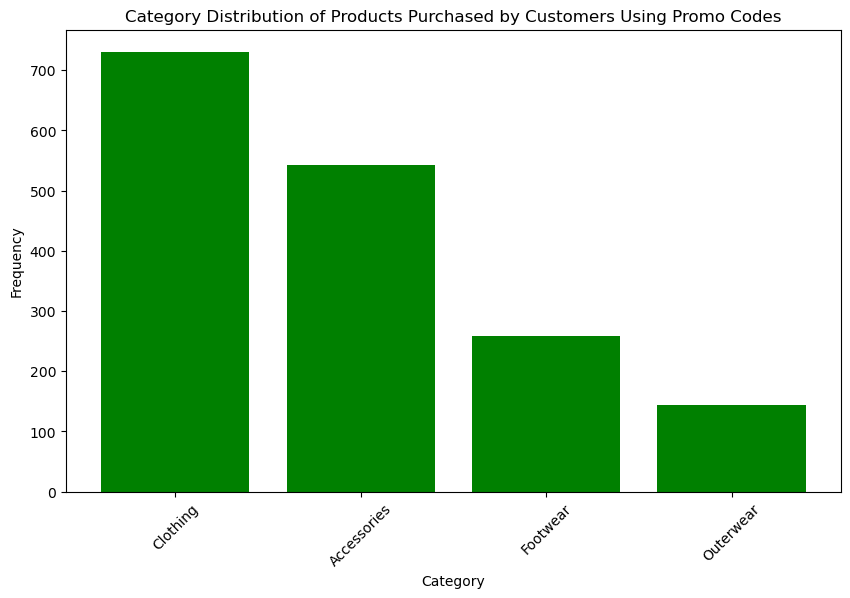

In [45]:
plot_bar(category_distribution, 'Category Distribution of Products Purchased by Customers Using Promo Codes', 'Category', 'Frequency', rotation=45)


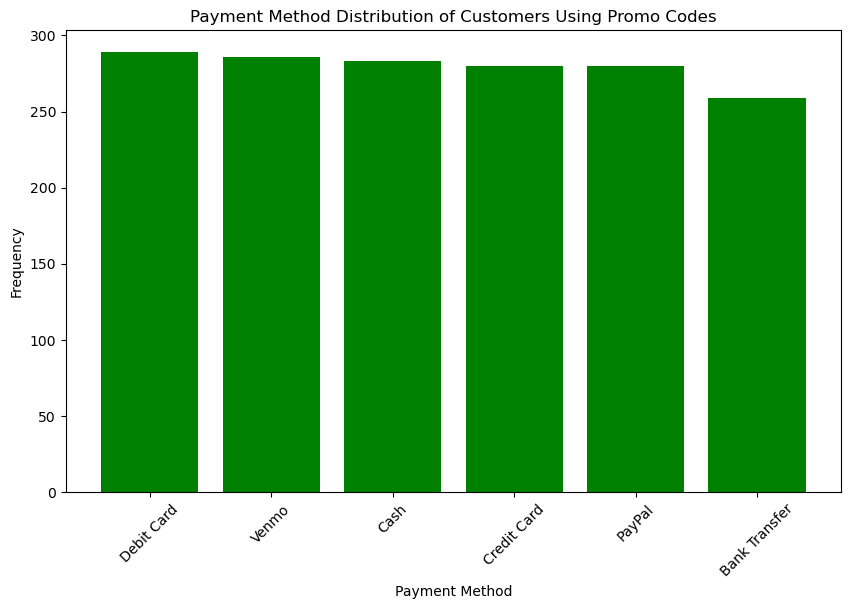

In [46]:
plot_bar(payment_method_distribution, 'Payment Method Distribution of Customers Using Promo Codes', 'Payment Method', 'Frequency', rotation=45)


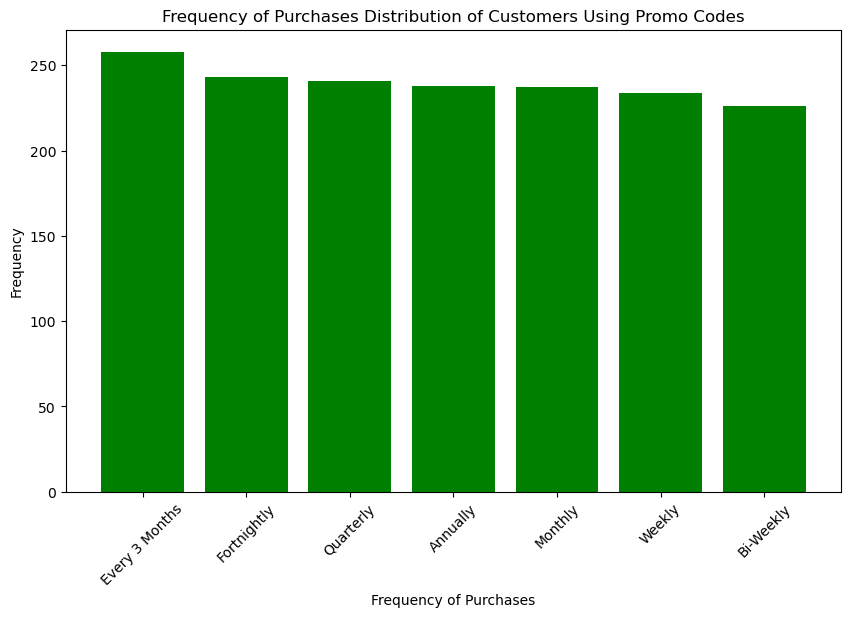

In [47]:
plot_bar(frequency_of_purchases_distribution, 'Frequency of Purchases Distribution of Customers Using Promo Codes', 'Frequency of Purchases', 'Frequency', rotation=45)
